In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 6})
import radTrans as rt
from scipy.interpolate import interp1d
import importlib
importlib.reload(rt)

<module 'radTrans' from 'C:\\Users\\rdatta\\Dropbox (MIT)\\PUFFIN\\Codes\\RadTrans Analysis\\radTrans.py'>

# Here, we test the interpolation models for emissivity and opacity
These models are stored in radtrans and called using the getEmi and getOpa functions.
These functions can be replaced by your own functions that return emissivity and opacity given density and temperature.

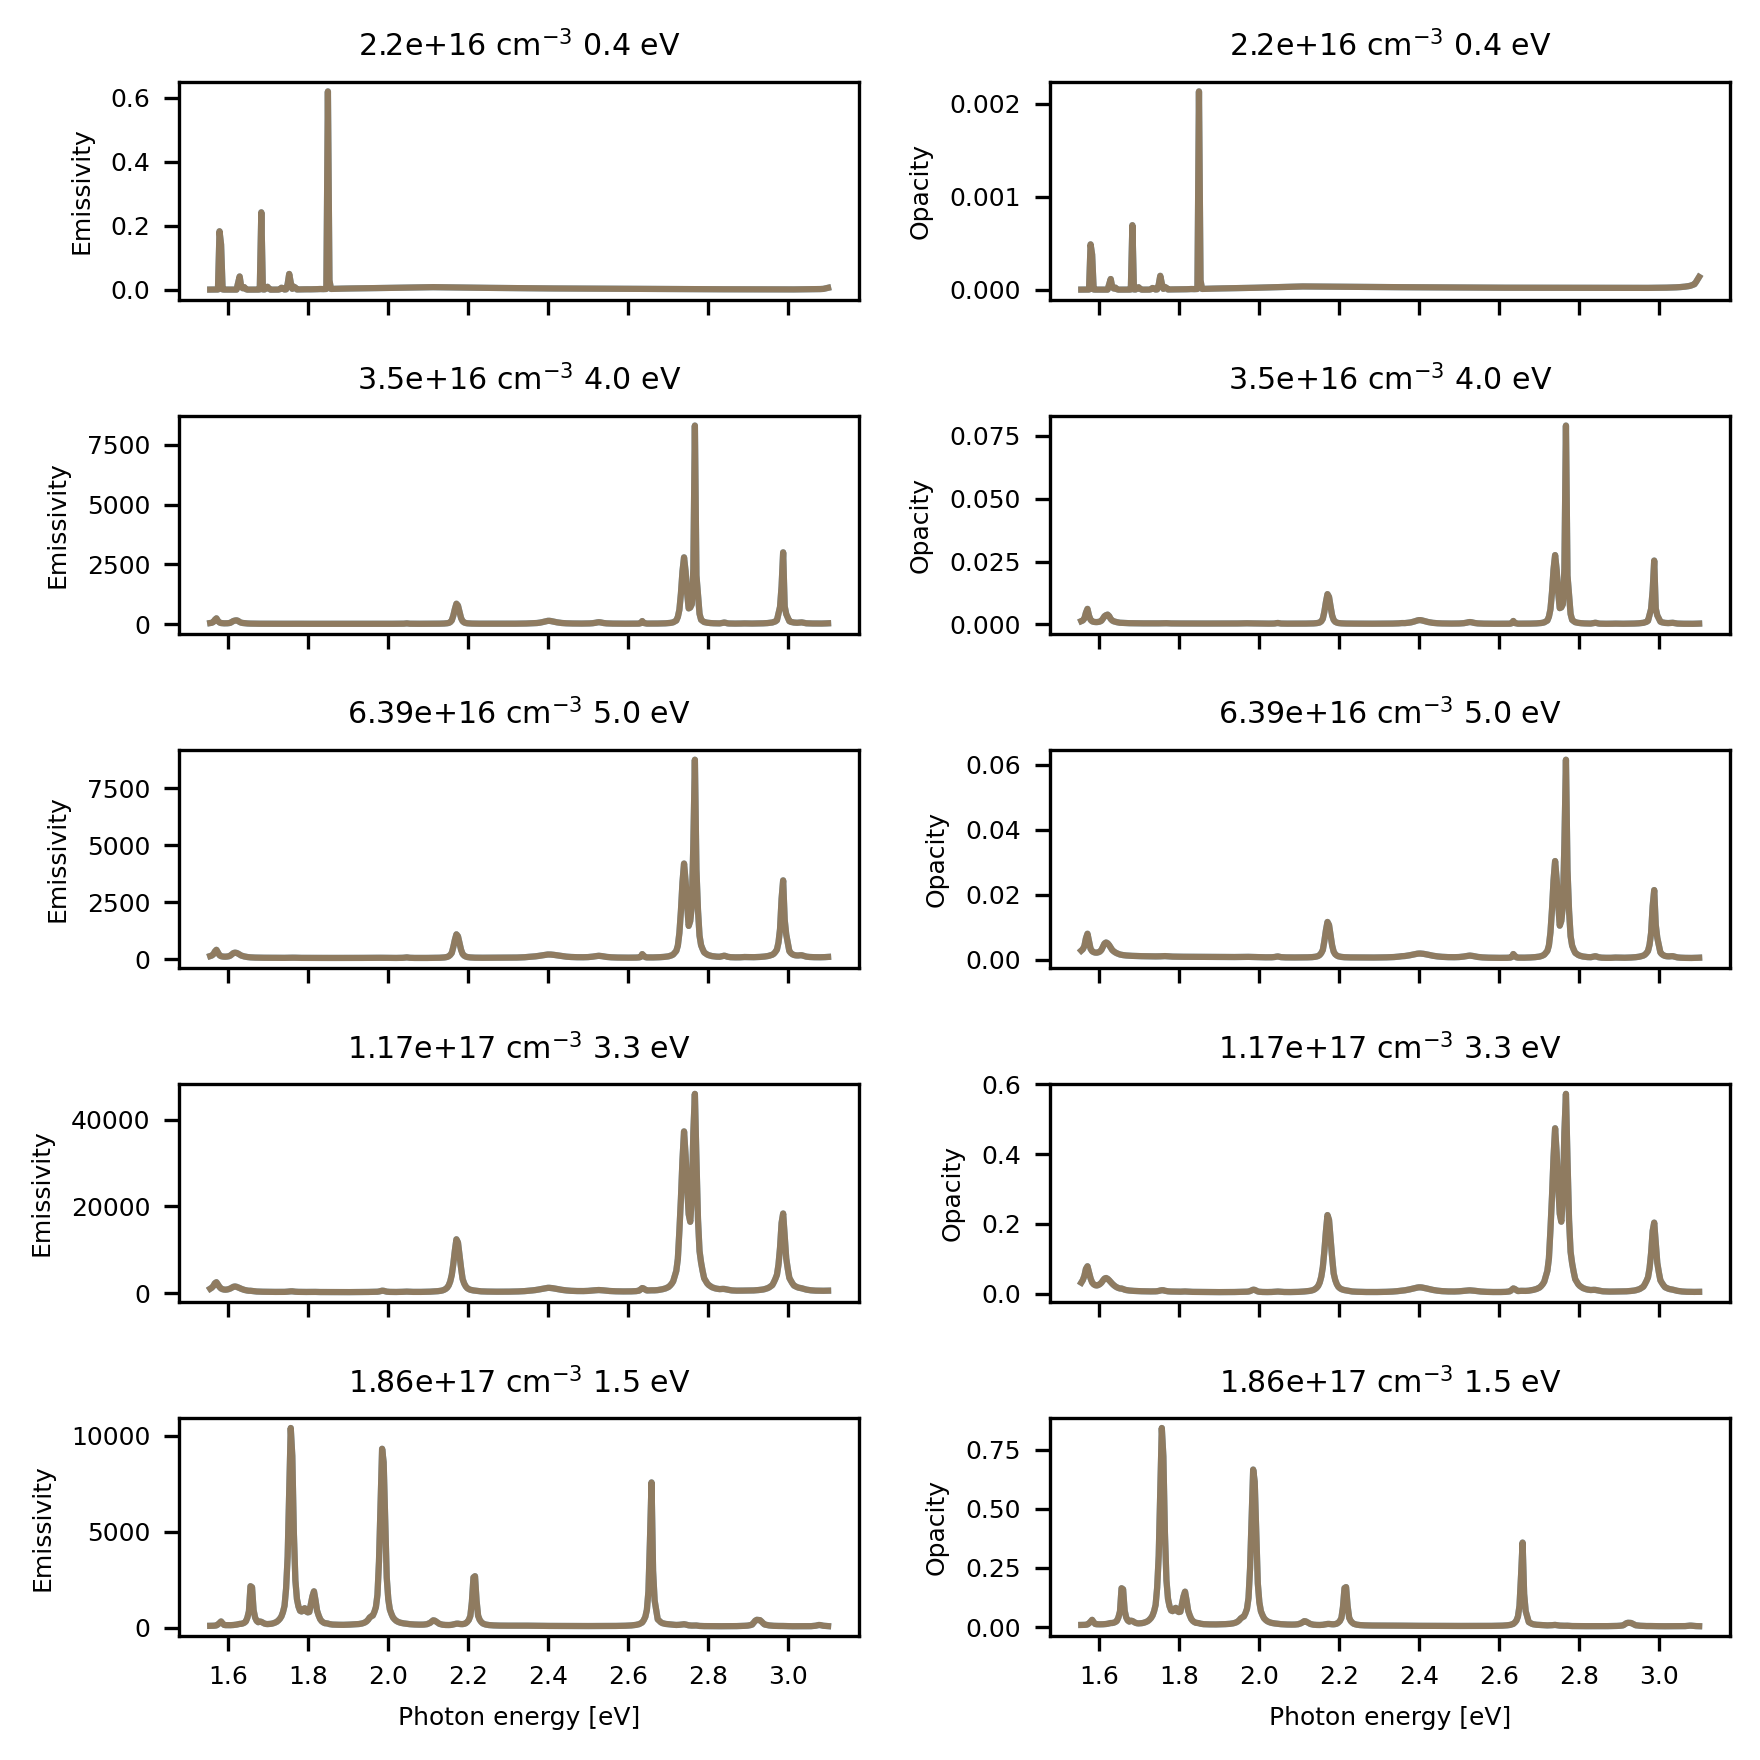

In [3]:
# Load the ni and T values used for the PrismSPECT Simulation
data = np.loadtxt("./Data/valuesV3.csv",
                 delimiter=",")
n_list = data[:,0] # cm^-3
T_list = data[:,1] # eV

# Plot some example spectra
inDir = '.\\Data\\AlVisibleV3\\results\\'

n_idx = np.random.randint(0,99, size=5) # randomly generate some indixes
T_idx = np.random.randint(0,50, size=5)

n_idx.sort() # sort so ni is increaisng

ni = n_list[n_idx]; T = T_list[T_idx] # values corresponding to indices

fig,axs = plt.subplots(ni.shape[0],2,figsize=(6,6),dpi=300,sharex=True)

for ii in range(ni.shape[0]):
    E,emi,opa = rt.getEmiOpa(ni[ii],T[ii],n_list,T_list,inDir)
    axs[ii,0].plot(E,emi)
    axs[ii,0].set_title(str(ni[ii]) + ' cm$^{-3}$ ' + str(T[ii]) + ' eV')
    axs[ii,0].set_ylabel('Emissivity')
    
    axs[ii,1].plot(E,opa)
    axs[ii,1].set_title(str(ni[ii]) + ' cm$^{-3}$ ' + str(T[ii]) + ' eV')
    axs[ii,1].set_ylabel('Opacity')
    
    # KNR model
    emi_knr = rt.getEmi(ni[ii],T[ii])
    opa_knr = rt.getOpa(ni[ii],T[ii])
    
    axs[ii,1].plot(E,opa_knr,alpha=0.5)
    axs[ii,0].plot(E,emi_knr,alpha=0.5)
    

axs[ni.shape[0]-1,0].set_xlabel("Photon energy [eV]")
axs[ni.shape[0]-1,1].set_xlabel("Photon energy [eV]")
fig.tight_layout(pad=2.0)
plt.show()

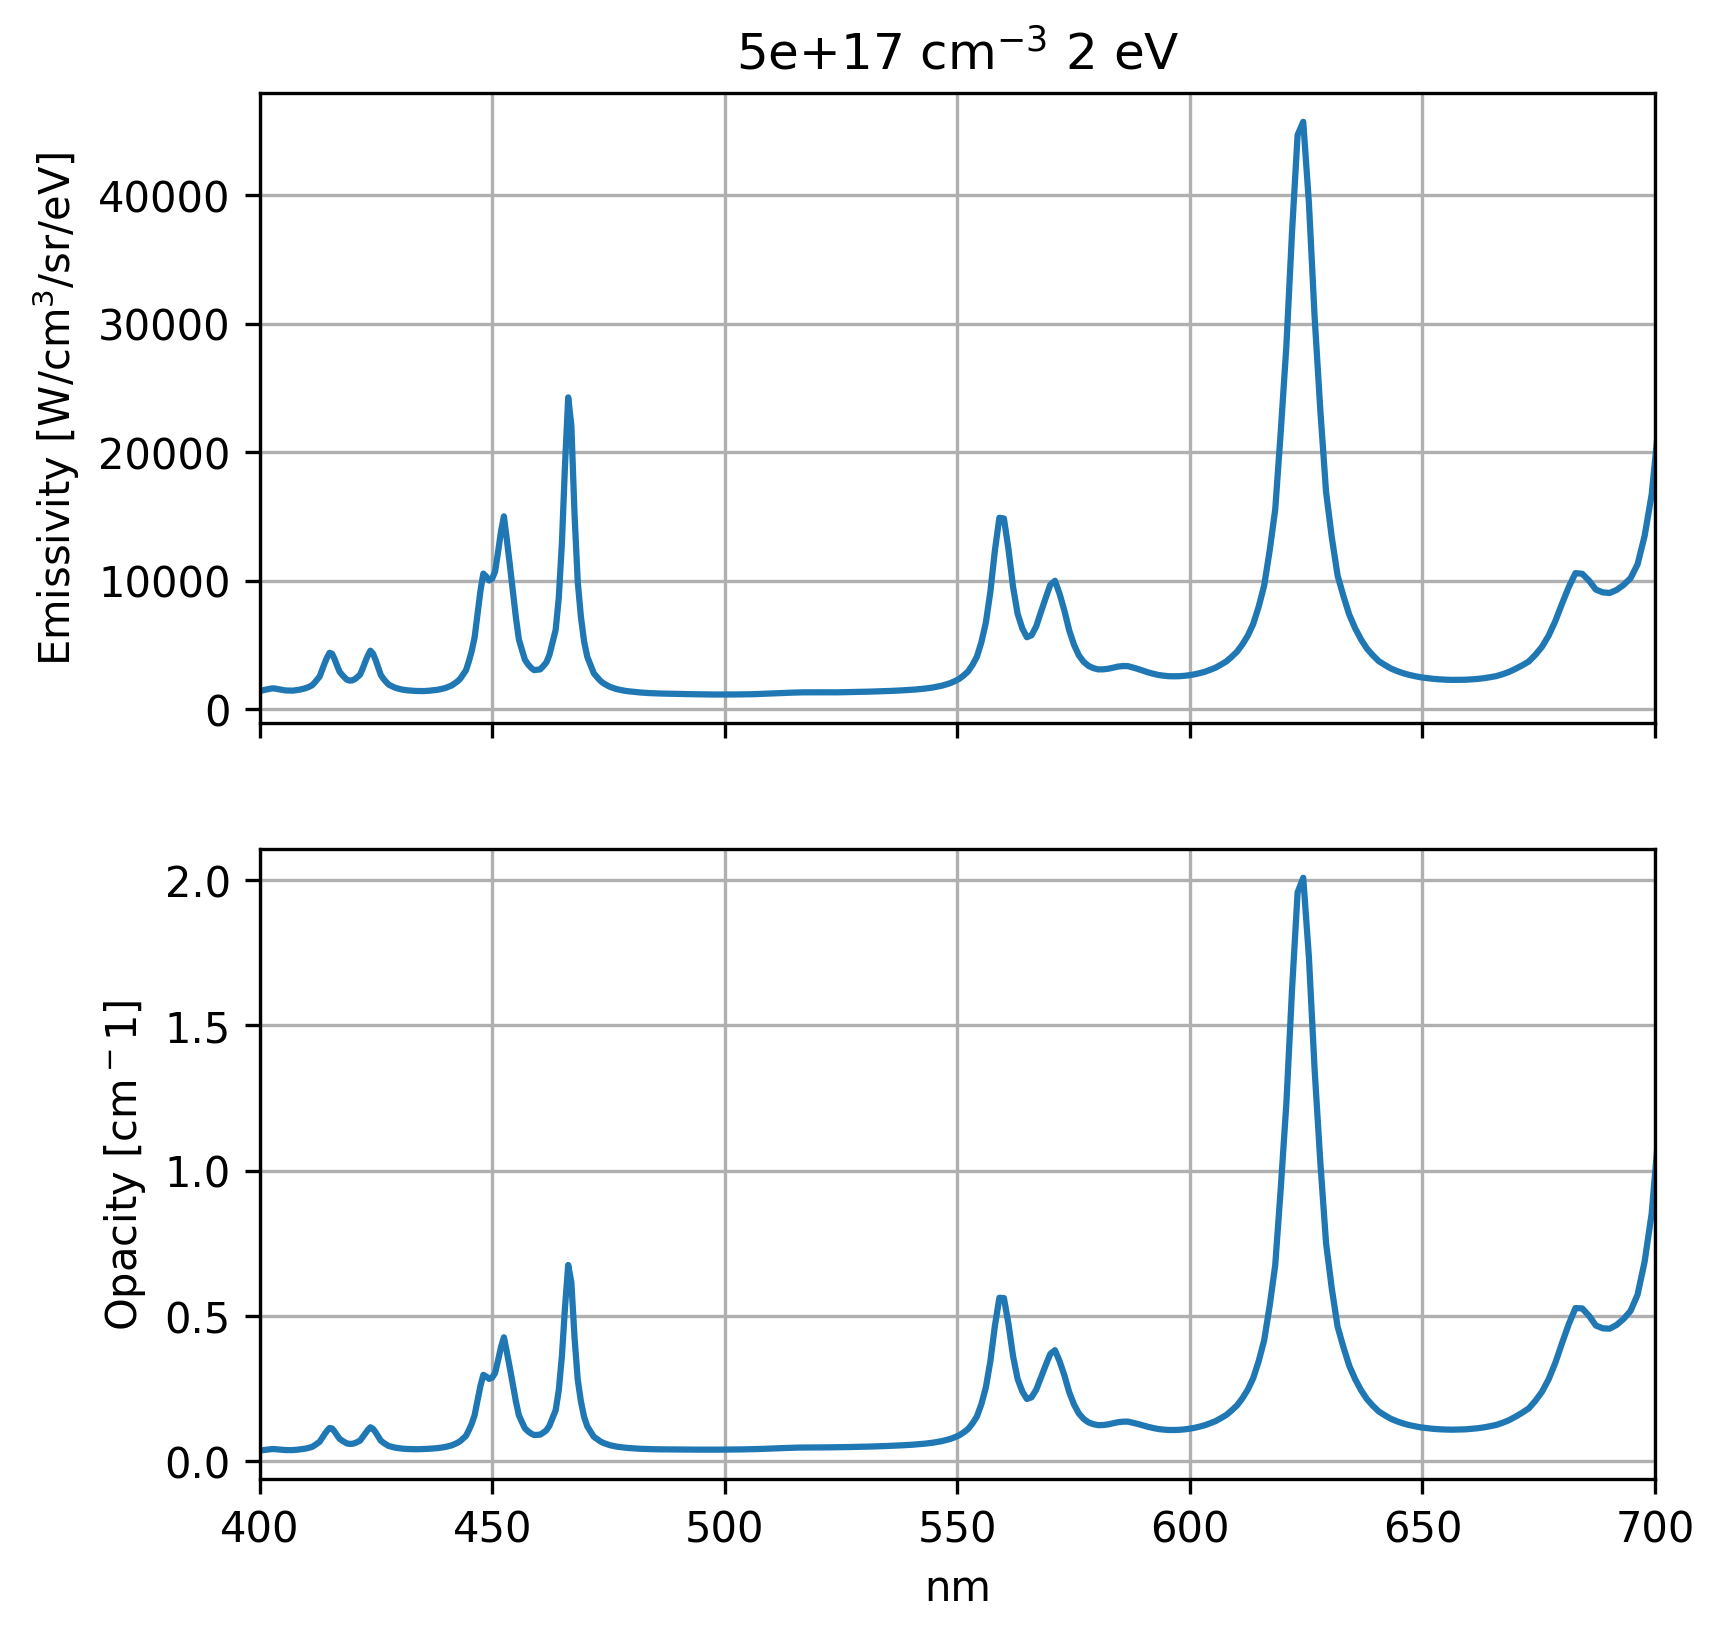

In [7]:
plt.rcParams.update({'font.size': 10})

fig,axs = plt.subplots(2,1,figsize=(6,6),dpi=300,sharex=True)
ni = 5e17
T = 2

# KNR model
emi = rt.getEmi(ni,T)
opa = rt.getOpa(ni,T)

axs[0].plot(1239.84193/E,emi)
axs[0].set_title(str(ni) + ' cm$^{-3}$ ' + str(T) + ' eV')
axs[0].set_ylabel('Emissivity [W/cm$^3$/sr/eV]')
    
axs[1].plot(1239.84193/E,opa)
axs[1].set_ylabel('Opacity [cm$^-1$]')
axs[1].set_xlabel('nm')
    
for ii in range(axs.shape[0]):
        axs[ii].grid()
        axs[ii].set_xlim([400,700])
